# Il naufragio del RMS Titanic e la probabilità secondo Kolmogorov

La lista dei passegeri è pubblica con una serie di informazioni interessanti, compreso l'esito del viaggio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wget

Diversi dati sui passeggeri del Titanic sono dispoibili online. Sorgente: https://github.com/tpradeep8/tableau-animation

Per comodità, possiamo scaricare direttamente il file in un'area locale con ```wget```.

Consideriamo anche che in futuro quei dati potrebbero non essere più disponibili in rete!

In [5]:
wget.download('https://raw.githubusercontent.com/tpradeep8/tableau-data-visualization/master/titanic passenger list.csv', out='data')

'data/titanic passenger list.csv'

Il file con i dati può essere anche caricato direttamente dal repository remoto:

```
df = pd.read_csv('https://github.com/tpradeep8/tableau-data-visualization/raw/master/titanic%20passenger%20list.csv')
```

Per motivi di rapidità e per avere una soluzione in caso di problemi di rete, è conveniente avere i dati in locale:

In [9]:
df = pd.read_csv('data/titanic passenger list.csv')

# Visualizzazione
I dati si possono visualizzare in forma di tabella

In [3]:
df

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex    age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00      0      0   24160  211.3375       B5        S    2   
1       male   0.92      1      2  113781  151.5500  C22 C26        S   11   
2     female   2.00      1      2  113781  151.5500  C22 C26        S  NaN   
3       male  30.00      1      2  113781  151.5500  C22 C26        S  NaN   
4     female  25.00      1      2  113781  151.5500  C22 C26        S  NaN   
...      ...    ...    ...    ...     ...       ...      ...      ...  ...   
1304  female  14.50      1      0    2665   14.4542      NaN        C  NaN   
1305  female    NaN      1      0    2665   14.4542      NaN        C  NaN   
1306    male  26.50      0      0    2656    7.2250      NaN        C  NaN   
1307    male  27.00      0      0    2670    7.2250      NaN        C  NaN   
1308    male  29.00      0      0  315082    7.8750      NaN        S  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1309 rows x 14 columns]

Gli istrogrammi possono essere visualizzati direttamente da Pandas

In [4]:
sex_counts = df['sex'].value_counts()
sex_counts

male      843
female    466
Name: sex, dtype: int64

In [5]:
all=sex_counts.sum()
print(all)

1309


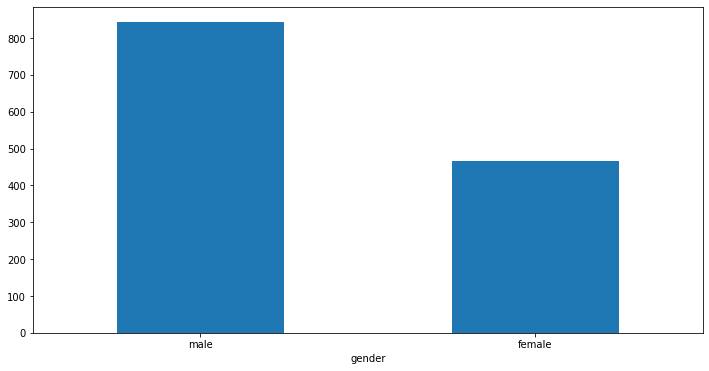

In [6]:
plt.figure(figsize=(12,6))
sex_counts.plot(kind='bar')
plt.xlabel('gender')
plt.xticks(rotation=0)
plt.show()

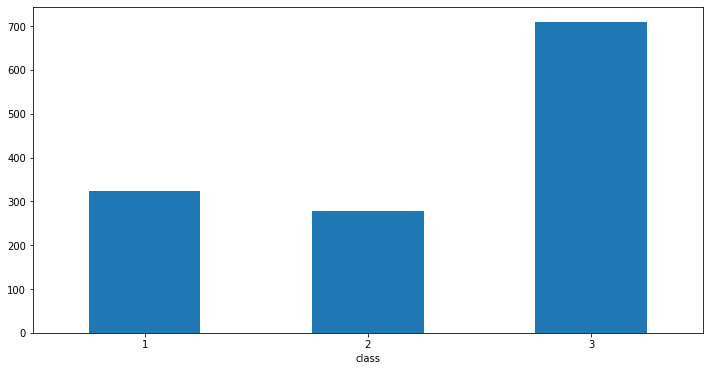

In [7]:
plt.figure(figsize=(12,6))
df['pclass'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('class')
plt.xticks(rotation=0)
plt.show()

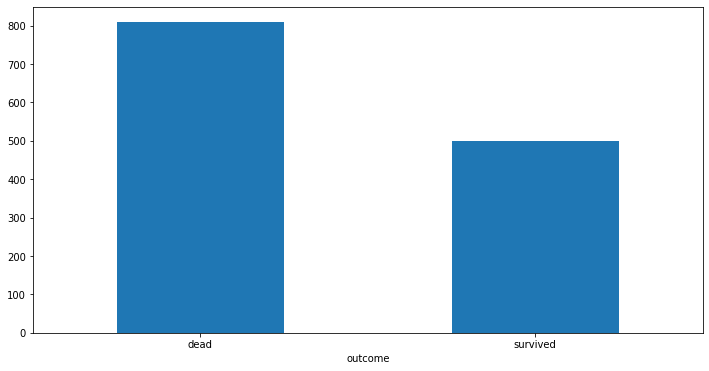

In [8]:
plt.figure(figsize=(12,6))
df['survived'].value_counts().sort_index().rename({0: 'dead', 1: 'survived'}).plot(kind='bar')
plt.xlabel('outcome')
plt.xticks(rotation=0)
plt.show()

Studiamo la distribuzione di età

In [9]:
df['age'].value_counts().sort_index()

0.17     1
0.33     1
0.42     1
0.67     1
0.75     3
        ..
70.50    1
71.00    2
74.00    1
76.00    1
80.00    1
Name: age, Length: 98, dtype: int64

Possiamo approssimare a zero le età minori di un anno

In [10]:
age_distr = np.floor(df['age']).value_counts().sort_index()

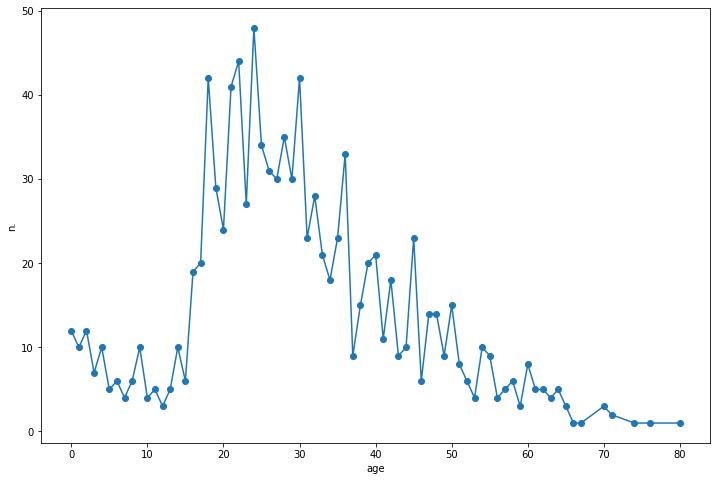

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))
age_distr.plot(figsize=(12,8),marker='o')
ax.set_xlabel('age')
ax.set_ylabel('n.')
fig.show()

La distribuzione cumulativa si può calcolare con ```cumsum()```.

all passengers:  1309 age unknown:  263


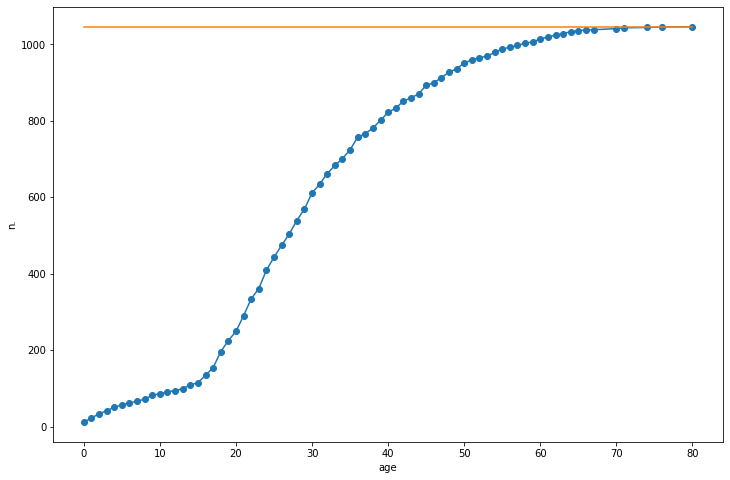

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))
age_distr.cumsum().plot(figsize=(12,8),marker='o')
ax.set_xlabel('age')
ax.set_ylabel('n.')
na = df.age.isna().sum()
print("all passengers: ", all, "age unknown: ", na)
age_known = all-na
plt.plot([0, 80],[age_known,age_known])
fig.show()


In [13]:
genders = df.sex.value_counts().sort_index().index.values
print('genders: ',genders)

genders:  ['female' 'male']


In [14]:
df.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [15]:
df.sex.value_counts().sort_index()

female    466
male      843
Name: sex, dtype: int64

In [16]:
c_gender = df.sex.value_counts().sort_index().values
print(genders[0],":", c_gender[0], genders[1],":", c_gender[1])

female : 466 male : 843


In [17]:
df[df.sex=='male'].survived.value_counts()

0    682
1    161
Name: survived, dtype: int64

In [18]:
df[df.sex=='female'].survived.value_counts()

1    339
0    127
Name: survived, dtype: int64

In [19]:
m_survived = df[df.sex=='male'].survived.value_counts().sort_index()
f_survived = df[df.sex=='female'].survived.value_counts().sort_index()
print("m, survived: ", m_survived[1], " dead: ", m_survived[0])
print("f, survived: ", f_survived[1], " dead: ", f_survived[0])

m, survived:  161  dead:  682
f, survived:  339  dead:  127


In [20]:
survived = df[df.survived==1].sex.value_counts().sort_index().values
dead = df[df.survived==0].sex.value_counts().sort_index().values

In [21]:
print("survived, f: ", survived[0], " m: ", survived[1])
print("dead, f: ", dead[0], " m: ", dead[1])

survived, f:  339  m:  161
dead, f:  127  m:  682


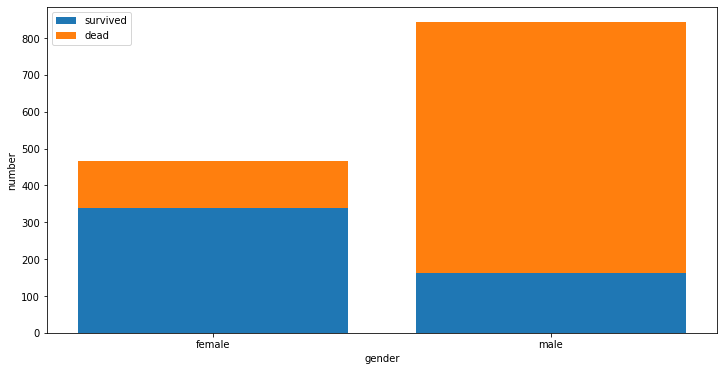

In [22]:
plt.figure(figsize=(12,6))
plt.bar(x=genders, height=survived, label='survived')
plt.bar(x=genders, bottom=survived, height=dead, label='dead')
plt.xlabel('gender')
plt.ylabel('number')
plt.legend()
plt.show()

# Approccio assiomatico di Kolmogorov alla probabilità

Consideriamo un *sample space* $\Omega$ e un *event space* $F \subseteq 2^\Omega$ che contiene $\Omega$ ($2^\Omega$ è l'insieme delle parti di $\Omega$), la probabilità $P$ è una funzione che associa ad ogni elemento $E$ di $F$ un valore reale. 

$P$ deve soddisfare alcune proprietà che la caratterizzano come misura:
1. $P(E)\ge 0\,\,\, \forall E\in F$
* $P(\Omega)=1$ (normalizzazione)
* $\forall(E_1,\cdots,E_n)\in F^n: E_i\cap E_j=0,\,\,\, P\left(\bigcup\limits_{i=1}^n E_i\right) = \sum\limits_{i=1}^n P(E_i)$

In questo caso, potremmo definire $\Omega$ come l'insieme dei 1309 passeggeri del Titanic. L'insieme delle parti comprende diversi sottoinsiemi di $\Omega$. Ad esempio:
* maschi
* femmine
* sopravvissuti
* passeggeri in 1^ classe, 2^ classe, 3^ classe
* maschi sopravvissuti
* donne sopravvissute
* maschi sopravvissuti in 3^ classe
* ... ecc.

La probabilità di uno dei sottoinsiemi $E$ può essere definita come:

$P(E) = \frac{\displaystyle n(E)}{\displaystyle n(\Omega)}$

Dove $n(\Omega)=1309$. Dividere per $n(\Omega)$ fornisce la normalizzazzione corretta affinché $P(\Omega)=1$.

Nel caso dei passeggerei del Titanic **non abbiamo alcun fenomeno casuale**. L'applicazione della teoria della probabilità di Kolmogorov è possibile interpretando la probabilità come frequenza di un evento $E$ rispetto al totale del campione di 1309 passeggeri.


[0.72746781 0.19098458] [466 843]


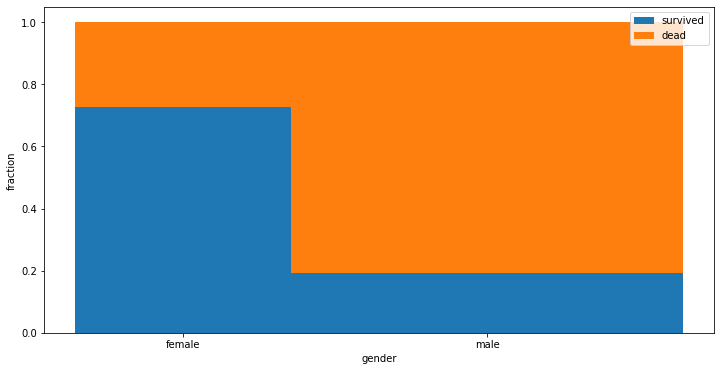

In [23]:
plt.figure(figsize=(12,6))
pos=(0, (c_gender[0]+c_gender[1])/2)
all=survived+dead
p_survived = survived/all
p_dead = dead/all
print(p_survived, c_gender)
plt.bar(x=pos, height=p_survived, width=c_gender, label='survived')
plt.bar(x=pos, bottom=p_survived, height=p_dead, width=c_gender, label='dead')
plt.xticks(pos, genders)
plt.legend()
plt.xlabel('gender')
plt.ylabel('fraction')
plt.show()

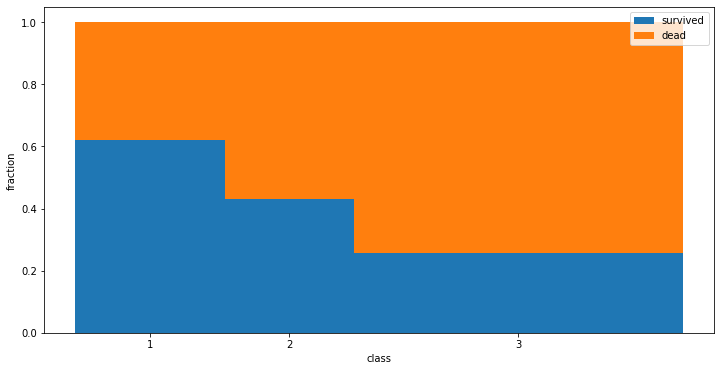

In [24]:
classes = df.pclass.value_counts().sort_index().index.values
c_classes = df.pclass.value_counts().sort_index().values
plt.figure(figsize=(12,6))
pos=[0, (c_classes[0]+c_classes[1])/2, (c_classes[0]+c_classes[2])/2+c_classes[1]]
survived = df[df.survived==1].pclass.value_counts().sort_index().values
dead = df[df.survived==0].pclass.value_counts().sort_index().values
all=survived+dead
p_survived = survived/all
p_dead = dead/all
plt.bar(x=pos, height=p_survived, width=c_classes, label='survived')
plt.bar(x=pos, bottom=p_survived, height=p_dead, width=c_classes, label='dead')
plt.xticks(pos, classes)
plt.legend()
plt.xlabel('class')
plt.ylabel('fraction')
plt.show()

Nei grafici sopra abbiamo rappresentato gli istogrammi con una larghezza pari al numero di persone in ciascuna categoria (maschi o femmine; 1^, 2^, o 3^ classe). Sull'asse verticale abbiamo rappresentato la probabilità dell'esito (sopravvissuto o morto). **Ciasuno dei rettangoli ha l'area proporzionale al numero di persone in ciascuna categoria**. In un istogramma classico, invece, il numero di persone è rappresentato come altezza della barra.

In [25]:
df_sex_pclass=df.groupby(['sex','pclass']).size()
df_sex_pclass

sex     pclass
female  1         144
        2         106
        3         216
male    1         179
        2         171
        3         493
dtype: int64

In [26]:
map =df_sex_pclass.unstack(level=1)
map

pclass    1    2    3
sex                  
female  144  106  216
male    179  171  493

In [27]:
df_sex_pclass.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

In [28]:
idx0= df_sex_pclass.index.get_level_values(0).unique()
idx0

Index(['female', 'male'], dtype='object', name='sex')

In [29]:
idx1=df_sex_pclass.index.get_level_values(1).unique()
idx1

Int64Index([1, 2, 3], dtype='int64', name='pclass')

In [30]:
print(idx0.size, idx1.size)

2 3


In [31]:
map.iloc[0,2]

216

Documentazione su heatmap e argomenti simili si trovano qui:
    
* heatmap in matplotlib:
    https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
* diverse colormap disponibili:
    https://matplotlib.org/tutorials/colors/colormaps.html

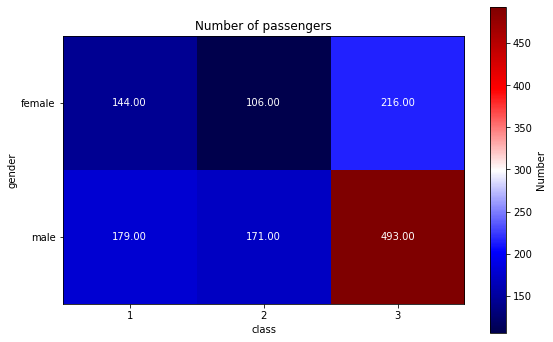

In [32]:
def plot_map(map, title, label):
    fig, ax = plt.subplots(figsize=(9, 6))
    im=ax.imshow(map, cmap='seismic')
    ax.set_xticks(np.arange(idx1.size))
    ax.set_xticklabels(idx1)
    ax.set_yticks(np.arange(idx0.size))
    ax.set_yticklabels(idx0)
    ax.set_xlabel('class')
    ax.set_ylabel('gender')
    for i in range(idx0.size):
        for j in range(idx1.size):
            text = ax.text(j, i, '{:.2f}'.format(map.iloc[i, j]), ha="center", va="center", color="white")
    ax.set_title(title)
    cbar = ax.figure.colorbar(im)
    cbar.set_label(label)
    fig.show()
plot_map(map, 'Number of passengers','Number')

In [33]:
map_survived=df[df.survived==1].groupby(['sex','pclass']).size().unstack(level=1)
map_dead=df[df.survived==0].groupby(['sex','pclass']).size().unstack(level=1)
map_prob=map_survived/(map)

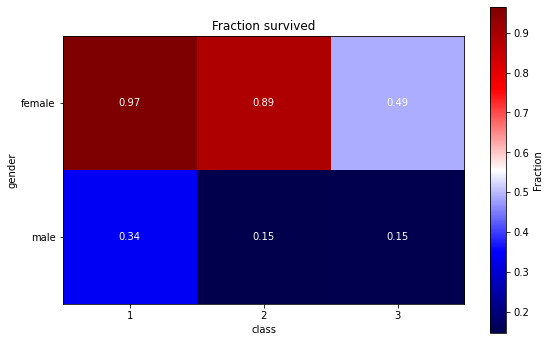

In [34]:
plot_map(map_prob, 'Fraction survived', 'Fraction')

# Probabilità condizionata

Quelli mostrati sopra sono esempi di probabilità condizionata. Formalmente può essere definita come:

$P(A|B) = \frac{\displaystyle P(A\cap B)}{\displaystyle P(B)}$

Ad esempio:

$P(\mathrm{survival}|\mathrm{female}) =  \frac{\displaystyle P(\mathrm{survival}\,\,and\,\,\mathrm{female})}{\displaystyle P(\mathrm{female})}$

Va notata la corrispondenza tra operatori logici sulle condizioni e operatori tra insieme:
* a $\longrightarrow$ $A$
* b $\longrightarrow$ $B$
* a $and$ b $\longrightarrow$ $A \cap B$
* a $or$ b $\longrightarrow$ $A \cup B$
* $not$ a $\longrightarrow$ $A^{c}$

In genere si tende ad abusare della notazione, e condizione o insieme corrispondente sono usati in modo intercambiabile:

$P(\mathrm{female}) \equiv P(\{x: \mathrm{sex}(x)=\mathrm{female}\})$

In [35]:
all = df['sex'].count()
print('all:',all)

all: 1309


In [36]:
females = df[df.sex=='female']['sex'].count()
print('females:',females)

females: 466


In [37]:
females_survived = df[(df.sex=='female') & (df.survived==1)]['sex'].count()
print('females, survived:',females_survived)

females, survived: 339


In [38]:
females_survived_frac = females_survived/females
print('fraction of survived, females: {:.2%}'.format(females_survived_frac))

fraction of survived, females: 72.75%


# Bayes theorem

La definizione di probabilità condizionata permette di scrivere due eguaglianze:
    
$P(A|B) = \frac{\displaystyle P(A\cap B)}{\displaystyle P(B)}$

$P(B|A) = \frac{\displaystyle P(A\cap B)}{\displaystyle P(A)}$

Da queste si ricava semplicemente:

$P(A|B) = \frac{\displaystyle P(B|A) P(A)}{\displaystyle P(B)}$


In [39]:
survived = df[df.survived==1]['sex'].count()
print('survived: ', survived)

survived:  500


In [40]:
survived_females_frac = females_survived/survived
print('females survived: {:.2%}'.format(survived_females_frac))

females survived: 67.80%


In [41]:
females_survived_frac_bayes = survived_females_frac*(survived/all)/(females/all)
print('fraction of females, survived: {:.2%}'.format(females_survived_frac_bayes))

fraction of females, survived: 72.75%


Il teorema di Bayes ha diverse applicazioni utili che vedremo in seguito. In particolare, sono utili le applicazioni in problemi medici.

In sostanza, indica come calcolare $P(A|B)$ dato $P(B|A)$, ossia come "invertire" l'espressione della probabilità condizionata.

È importante quindi non confondere le due, cosa che invece intuitivamente si è spesso portati a fare:

La probabilità che un senatore sia donna è diversa dalla probabilità che una donna sia senatrice!

# Spunti per gli esercizi

* Calcolare la probabilità di sopravvivenza per fasce di prezzo del biglietto
* Calcolare la probabilità di sopravvivenza per le diverse zone in cui erano suddivise le cabine
* Calcolare la probabilità di sopravvivenza per fasce di età, eventualmente selezionando un campione omogeneo (es.: uomini, terza classe, donne prima classe, ecc.)